# Lab 8: K-Nearest Neighbor

In this lab we will be using the library scikit-learn to train a K-Nearest Neighbor classifier and graph the results.

[VIDEO LINK](https://drive.google.com/open?id=1fbMbcNMsWXPFPAZPsAZq5IzPVYOJ5KbC)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 1: Load and visualize dataset

- Below, load in the datasets (`file_train.csv`, `file_test.csv`). the training set has 800 samples and the test set has 200 samples.
- Create a plot with two subplots showing the train and test data side-by-side.
    - Be sure to label your subplots with informative titles (which datset are we looking at?).
    - Color-code the points based on their class.
    - Set the figure size to make everything clearly legible (not microscopic).

#### Format of data
- Column 1: x coordinate of a 2D point.
- Column 2: y coordinate of a 2D point.
- Column 3: class. Which spiral arm does the point belong to? Labels: [0, 1]

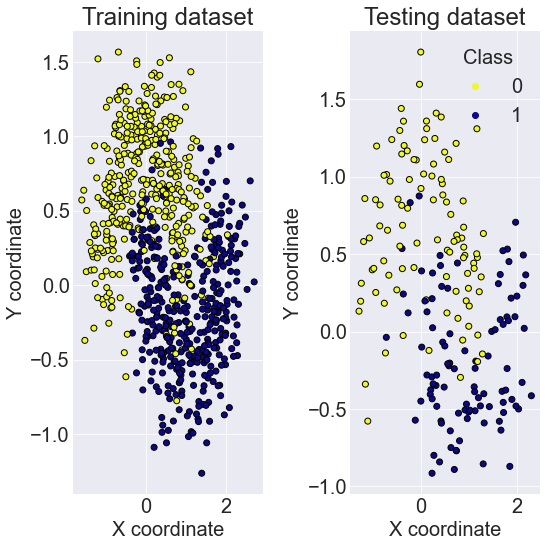

In [6]:
df1 = pd.read_csv("data/file_train.csv")
training = df1.to_numpy()
df2 = pd.read_csv("data/file_test.csv")
testing = df2.to_numpy()
fig, ax = plt.subplots(1,2, figsize=(8, 8))
ax[0].set_title("Training dataset")
scatter = ax[0].scatter(training[:,0], training[:,1], c = training[:,2], cmap = 'plasma_r', edgecolors = 'black' )
ax[0].set_xlabel('X coordinate')
ax[0].set_ylabel('Y coordinate')

handles, labels = scatter.legend_elements(prop = 'colors')
legend1 = ax[1].legend(handles, ['0', '1'], loc="upper right", title="Class")

ax[1].set_title("Testing dataset")
scatter = ax[1].scatter(testing[:,0], testing[:,1], c = testing[:,2], cmap = 'plasma_r', edgecolors = 'black' )
ax[1].set_xlabel('X coordinate')
ax[1].set_ylabel('Y coordinate')

handles, labels = scatter.legend_elements(prop = 'colors')
legend1 = ax[1].legend(handles, ['0', '1'], loc="upper right", title="Class")

fig.tight_layout()
plt.show()

## Task 2: Predict dataset and graph results

1. Create a [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) [(More Info)](https://scikit-learn.org/stable/modules/neighbors.html#classification).  Set n_neighbors equal to 10.
2. Use the fit method with the coordinate columns of the training dataset as X and the class column as the target.
3. Calculate the accuracy of the classifier with the test data using the score method.
4. Print the accuracy of the classifier.
    

In [7]:
neigh = neighbors.KNeighborsClassifier(n_neighbors = 10)
neigh.fit(training[:,:2], training[:,2])
accuracy = neigh.score(testing[:,:2], testing[:,2])
print("The accuracy is ", accuracy)
print("Your accuracy should equal 0.92")

The accuracy is  0.9195979899497487
Your accuracy should equal 0.92


## Task 3: Visualize class boundaries

Visualize how different regions of the (2D) dataspace would be classified based on the results of the trained KNN Classifier from Task 2.

1. Create a meshgrid for predicting values
    1. Create your x-axis and y-axis linspace 
        2. Set the start argument to the min value of your column -.5
        3. Set the end argument to the max value of your column +.5
        4. Set the number of samples to 300
    2. Assign `x_samples` and `y_samples` to a [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) with the linspace as the arguments for x1 and x2.
    3. Create a list of x and y sample coordinate pairs, by [column stacking](https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html) `x_samples` [flattened](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.flatten.html) and `y_samples` flattened.
2. Use your coordinate pairs as predict inputs for the classifier you created in Task 2. Reshape the results to the same shape as `x_samples`.
1. In 1 plot, graph your results
    1. Create two [ListedColormap](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.colors.ListedColormap.html) [(example)](https://matplotlib.org/3.2.1/tutorials/colors/colormap-manipulation.html)
        1. One should have dark values of 2 colors
        1. One should have light values of the same 2 colors
    1. Use [pcolormesh](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html) to plot your predicted values grid.
        1. Plot x_samples, y_samples and your predicted results and the light value colormap.
    2. Plot the training points with using a scatter plot with the dark value colormap.
    3. Title your plot and label the axis.

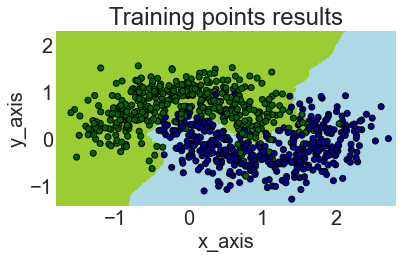

In [10]:
minimum = np.min(testing[:,0], axis=0)
maximum = np.max(testing[:,0], axis=0)
x_linspace = np.linspace(minimum-0.5,maximum+0.5, num=300)

minimum = np.min(testing[:,1], axis=0)
maximum = np.max(testing[:,1], axis=0)
y_linspace = np.linspace(minimum-0.5,maximum+0.5, num=300)

x_samples, y_samples = np.meshgrid(x_linspace, y_linspace)

coordinate_pairs = np.column_stack((x_samples.flatten(), y_samples.flatten()))

classify_result = neigh.predict(coordinate_pairs)
classify_result = classify_result.reshape(x_samples.shape)

colors=['darkgreen', 'darkblue']
cmap_dark = ListedColormap(colors)
colors=['yellowgreen', 'lightblue']
cmap_light = ListedColormap(colors)

fig, ax = plt.subplots()
im = ax.pcolormesh(x_samples, y_samples, classify_result, cmap=cmap_light)
ax.set_title('pcolormesh of predicted results')
ax.set_xlabel('x_samples')
ax.set_ylabel('y_samples')

plt.scatter(training[:,0], training[:,1], c = training[:,2], cmap = cmap_dark, edgecolors = 'black')
plt.title('Training points results')
plt.xlabel('x_axis')
plt.ylabel('y_axis')

fig.tight_layout()
plt.show()